<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Module4_AllLabs_AIML_-/blob/main/MODULE4_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 4 : PERCEPTRON AND GRADIENT DESCENT**

# Lab 2 : INTRODUCTION TO GRADIENT DESCENT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(37)
np.random.seed(37)

In [2]:
def eval_2nd_degree(coeffs, x):
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 95)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

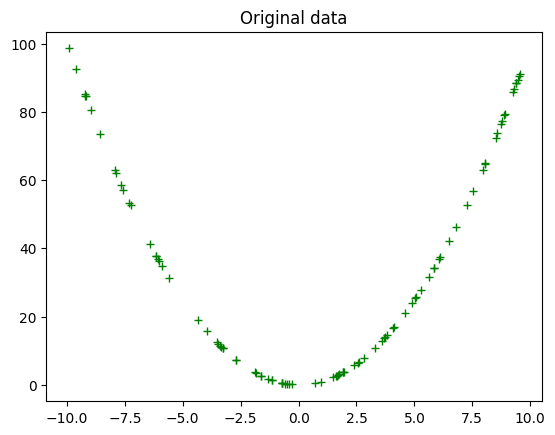

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [5]:
def eval_2nd_degree_jitter(coeffs, x, j):
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max

    while interval_min > jit_val:
        jit_val = random.random() * interval_max


    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


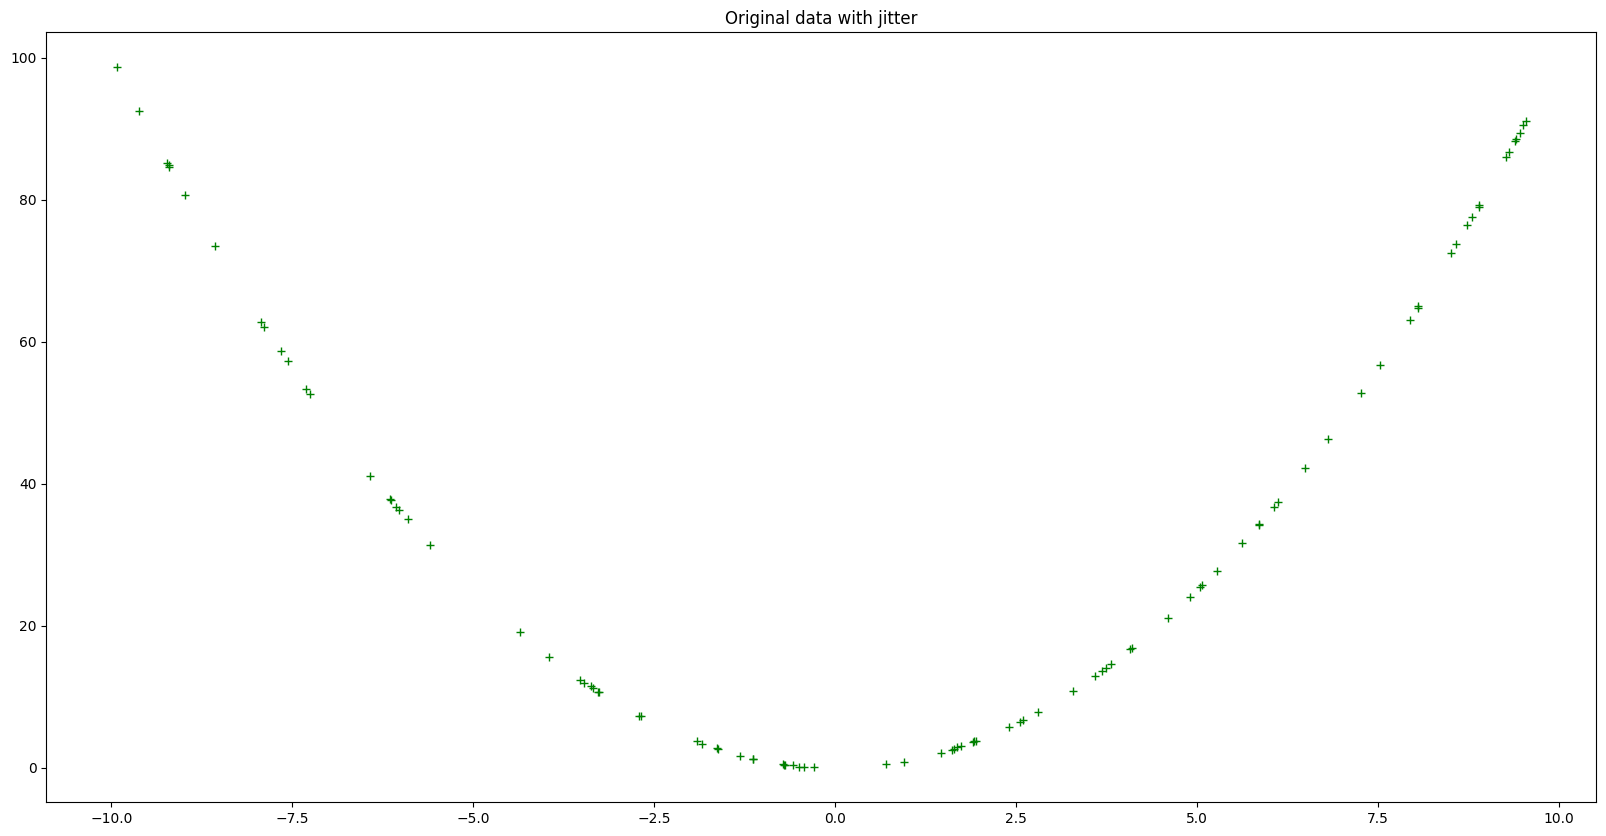

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

In [7]:
def loss_mse(ys, y_bar):
    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

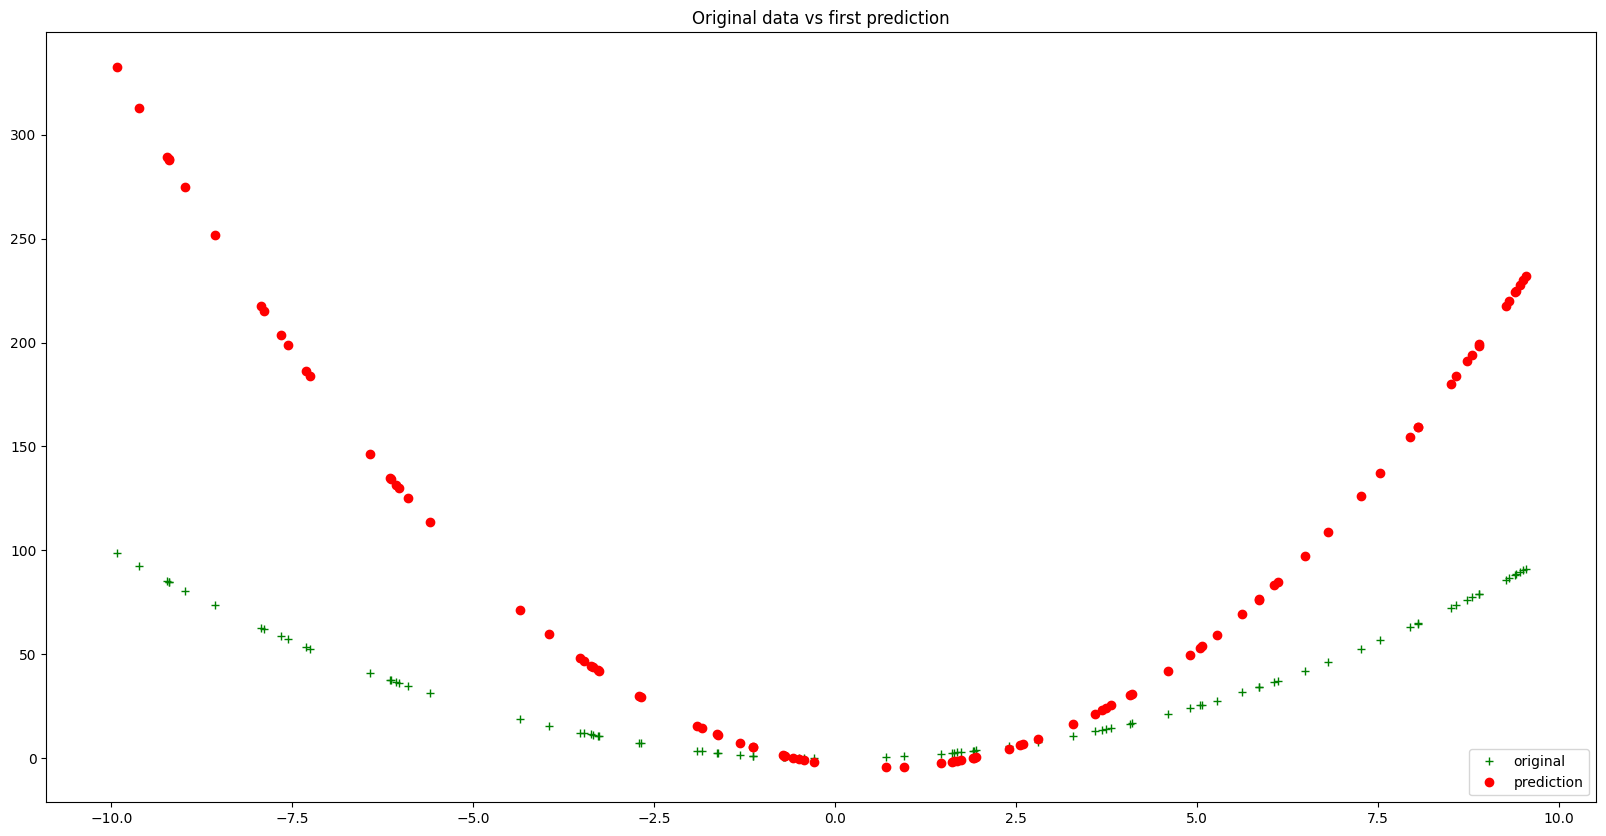

In [8]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(20, 10))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [9]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

8045.691277934596

In [10]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-1 / n) * sum(a_s)
    gradient_b = (-1 / n) * sum(b_s)
    gradient_c = (-1 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [12]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0005
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (0.9817558105458359, -3.9800062070785236, -3.031204373847339)
Now have smaller model loss: 583.5111210931262 vs 8045.691277934596


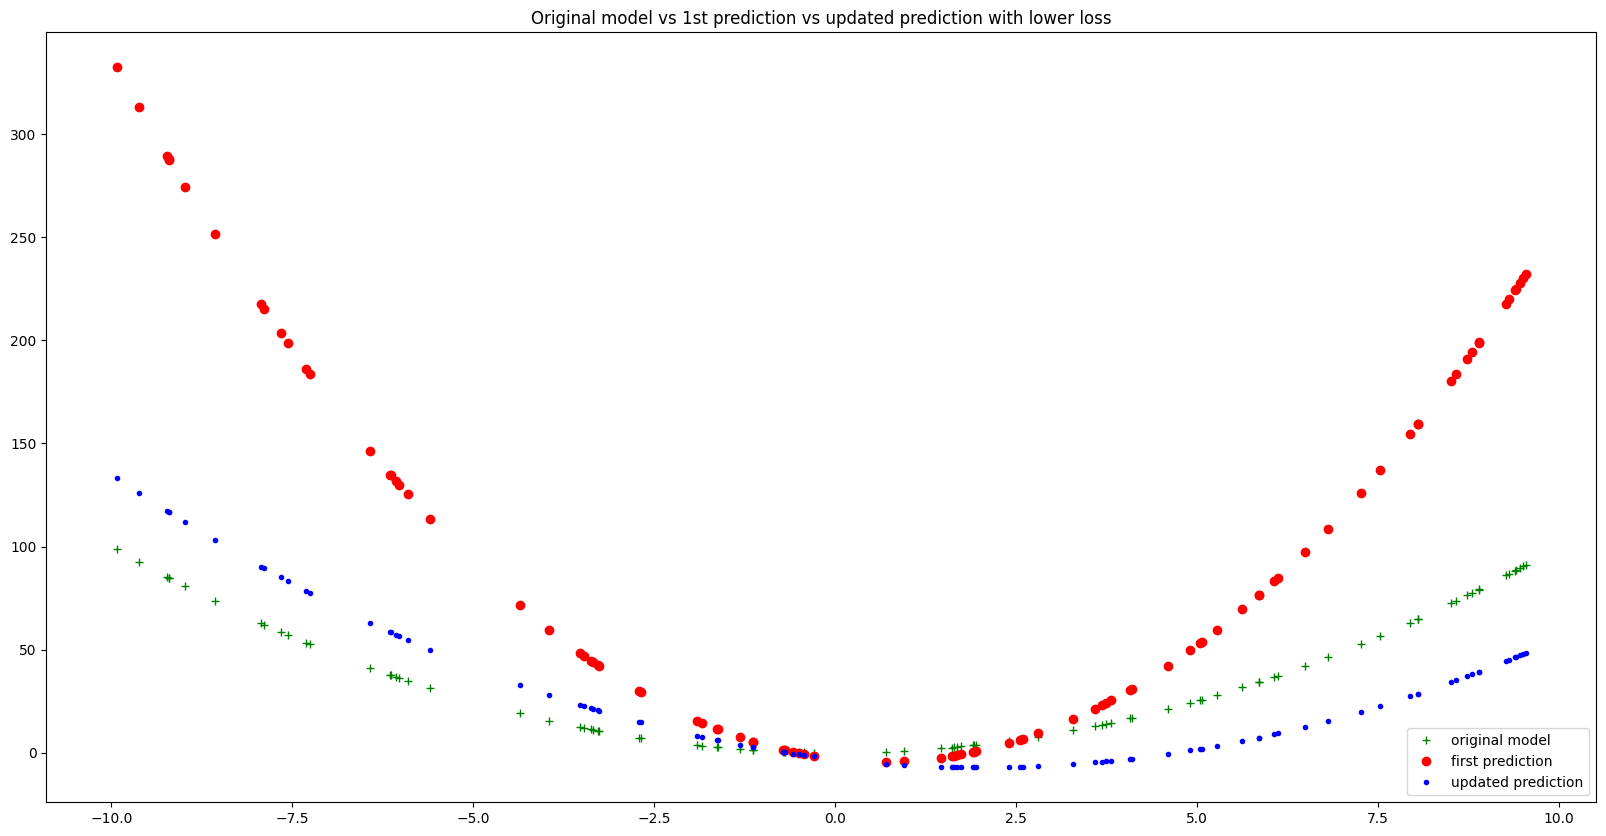

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [14]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [16]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.
    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate
    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [17]:
GD = gradient_descent(30000, 0.0003)

[1211.8476021322424, 567.5204744035177, 490.6906088549652, 466.52773410977795, 447.86182641450307, 430.3470329694758, 413.5599038906853, 397.43716324588985, 381.949480518637, 367.0715602705825, 352.779366798145, 339.0498349445111, 325.8608099460865, 313.1910095772123, 301.01998961035815, 289.3281108034203, 278.0965072021797, 267.3070556922416, 256.9423467499861, 246.9856563451973, 237.4209189500202, 228.23270161067714, 219.40617904010364, 210.9271096912982, 202.7818127727802, 194.95714616905013, 187.4404852304273, 180.21970239802747, 173.28314763100082, 166.61962960443879, 160.21839764760682, 154.06912439335284, 148.16188911068738, 142.48716169363877, 137.03578728054, 131.79897147892544, 126.76826617219234, 121.9355558851187, 117.29304468623475, 112.83324360590791, 108.54895854983636, 104.4332786884438, 100.47956530343777, 96.68144107353035, 93.03277978202982, 89.52769642969146, 86.16053773687202, 82.92587301965732, 79.81848542523953, 76.83336351239788, 73.96569316349485, 71.2108498149

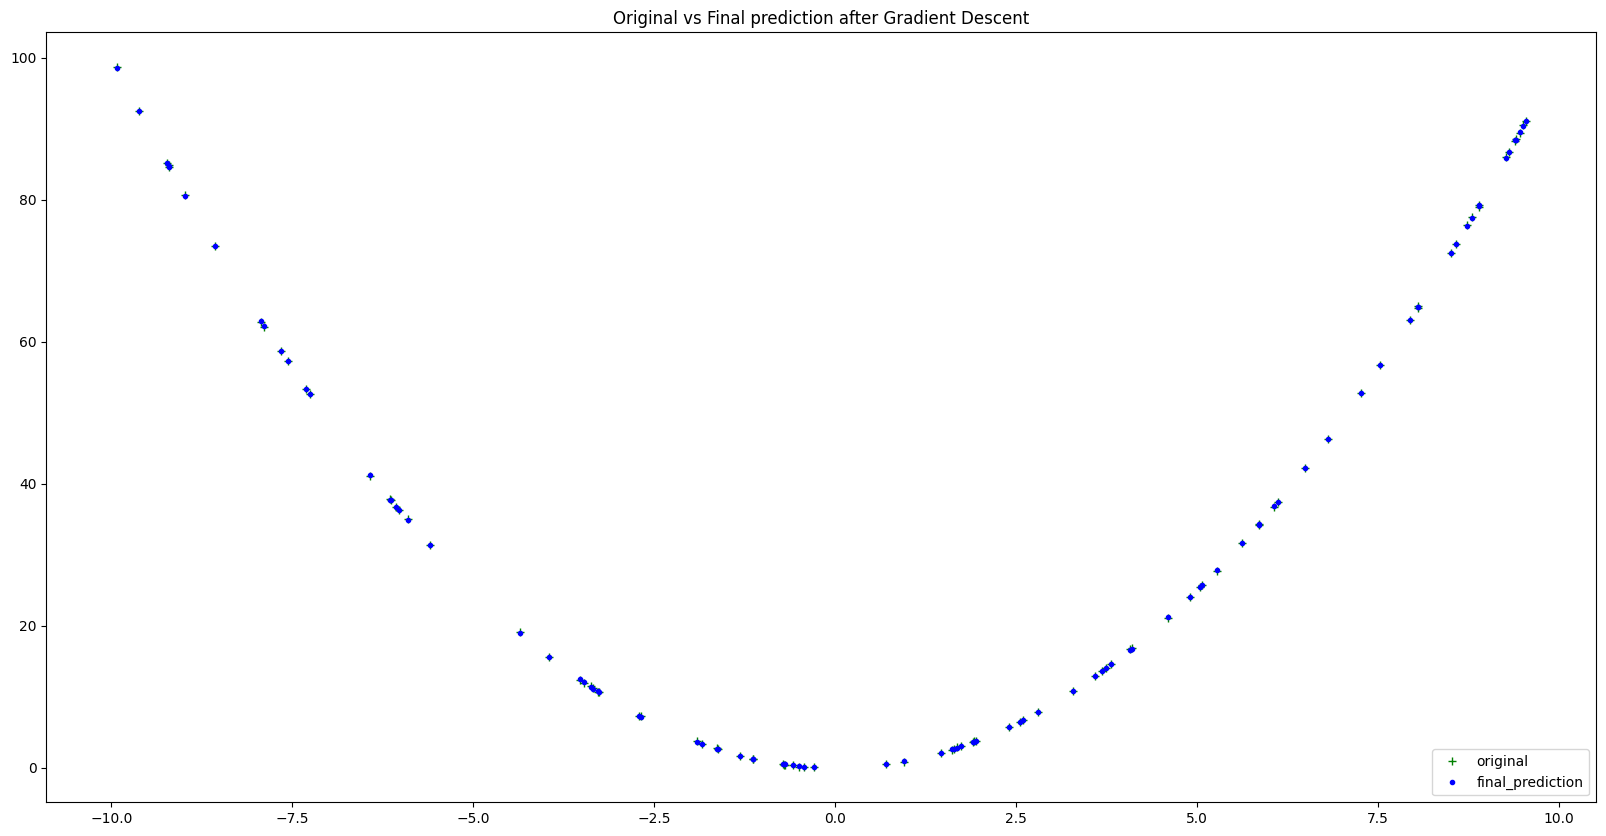

In [18]:
plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [19]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (1.000178618188046, -0.0003219549371579966, -0.011535974967719744)
Original Coefficients: [1, 0, 0]


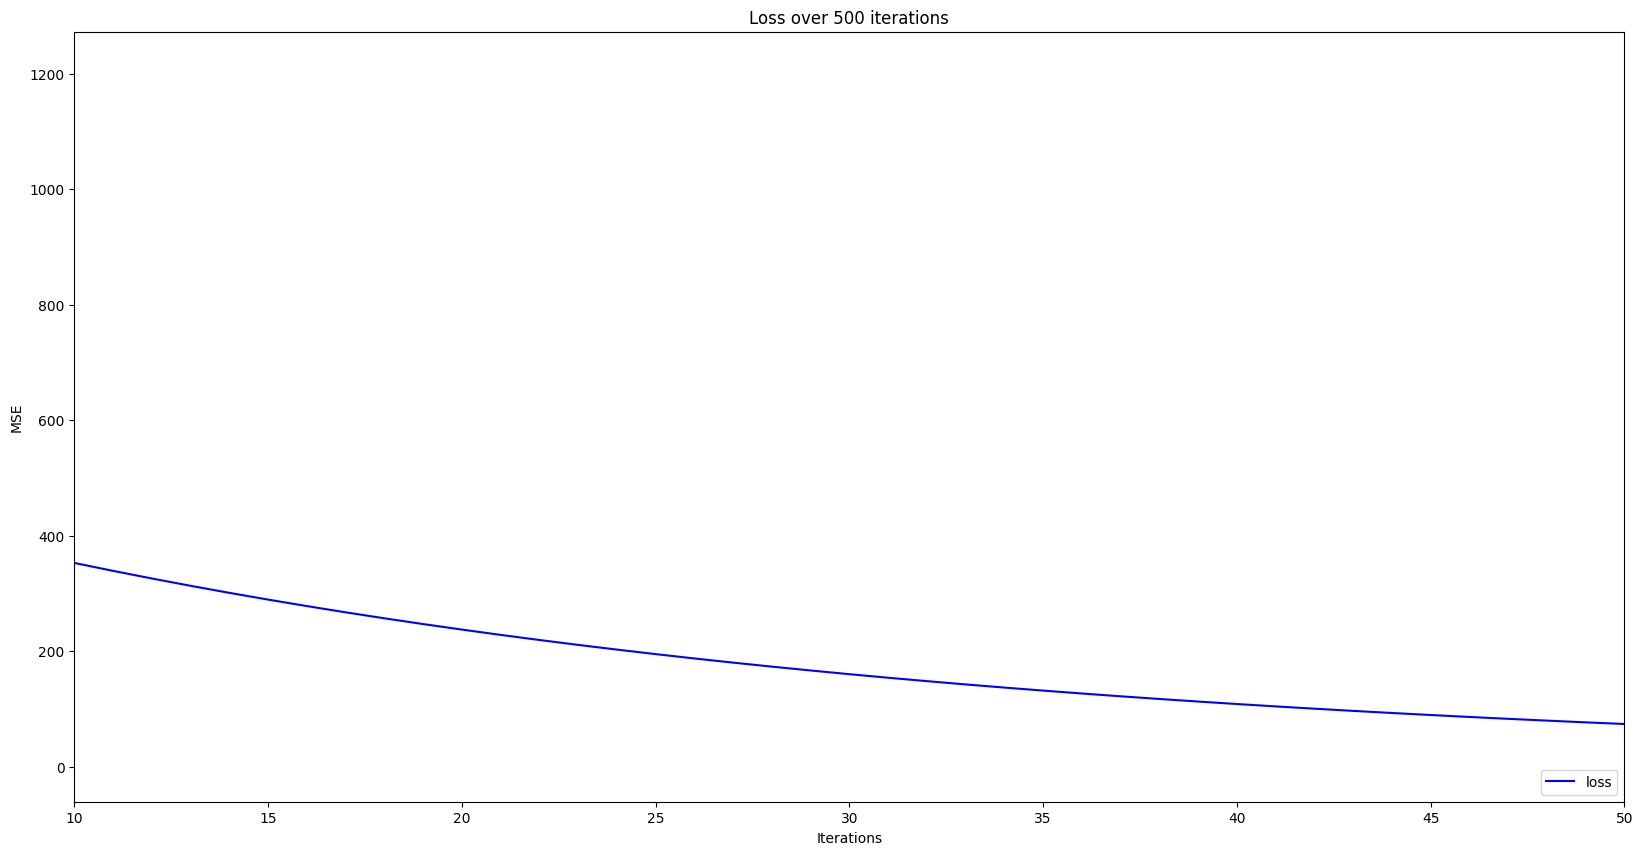

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((10,50))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

# **TRY QUESTIONS:**

**1.  Change the coefficients array and try a different polynomial instead of our  x^2**

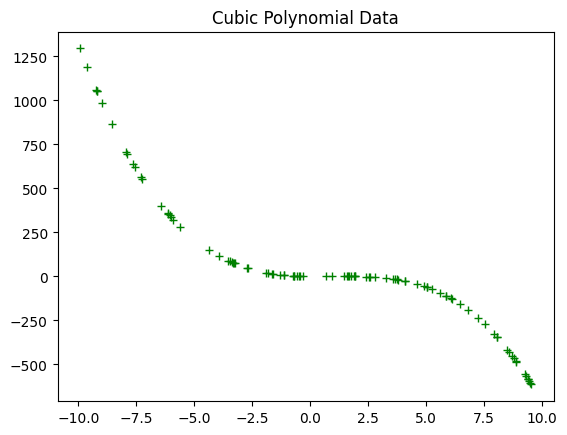

In [35]:
# Set seeds for reproducibility
random.seed(37)
np.random.seed(37)

# Cubic polynomial coefficients
coeffs_cubic = [1, -2, 3, -1]
def eval_polynomial(coeffs, x):
    y = sum(c * (x ** i) for i, c in enumerate(coeffs))
    return y
hundred_xs = np.random.uniform(-10, 10, 95)
ys_cubic = [eval_polynomial(coeffs_cubic, x) for x in hundred_xs]
plt.plot(hundred_xs, ys_cubic, 'g+')
plt.title('Cubic Polynomial Data')
plt.show()


**2.  Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?**

<ipython-input-22-1104704b33d7>:20: RuntimeWarning: overflow encountered in square
  return np.mean((ys - y_bar) ** 2)
<ipython-input-36-47c3321f1e1e>:6: RuntimeWarning: invalid value encountered in scalar subtract
  coeffs = [c - lr * g for c, g in zip(coeffs, gradients)]


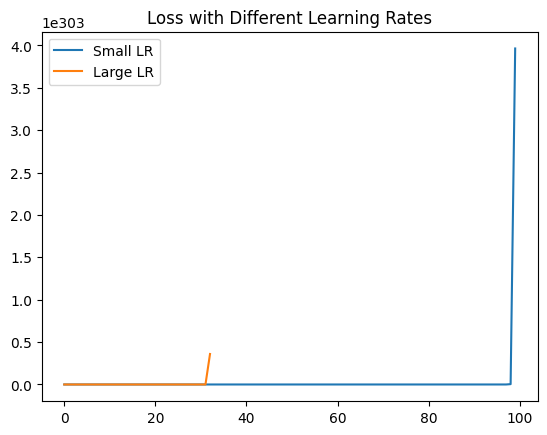

In [36]:
# Gradient Descent function for different learning rates
def gradient_descent(xs, ys, coeffs, lr, epochs):
    losses = []
    for _ in range(epochs):
        gradients = calc_gradient_polynomial(coeffs, xs, ys)
        coeffs = [c - lr * g for c, g in zip(coeffs, gradients)]
        y_bar = np.array([eval_polynomial(coeffs, x) for x in xs])
        loss = loss_mse(ys, y_bar)
        losses.append(loss)
    return coeffs, y_bar, losses
coeffs_small_lr, y_bar_small_lr, losses_small_lr = gradient_descent(hundred_xs, ys_cubic, [0, 0, 0, 0], 0.0001, 1000)
coeffs_large_lr, y_bar_large_lr, losses_large_lr = gradient_descent(hundred_xs, ys_cubic, [0, 0, 0, 0], 0.1, 1000)
plt.plot(losses_small_lr, label='Small LR')
plt.plot(losses_large_lr, label='Large LR')
plt.legend()
plt.title('Loss with Different Learning Rates')
plt.show()


**3.  Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x^2 ?**

<ipython-input-22-1104704b33d7>:20: RuntimeWarning: overflow encountered in square
  return np.mean((ys - y_bar) ** 2)
<ipython-input-22-1104704b33d7>:26: RuntimeWarning: overflow encountered in multiply
  gradients.append(-2 * np.sum(errors * (xs ** i)) / len(xs))
<ipython-input-35-98bcf4864a24>:8: RuntimeWarning: invalid value encountered in scalar add
  y = sum(c * (x ** i) for i, c in enumerate(coeffs))


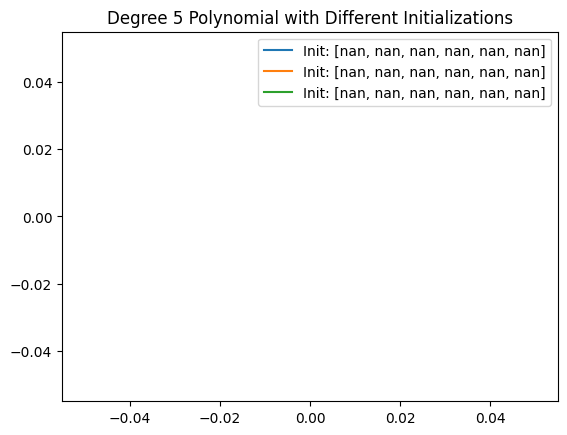

In [37]:
# Degree 5 polynomial coefficients
coeffs_degree5 = [1, -2, 3, -1, 0.5, -0.1]

ys_degree5 = [eval_polynomial(coeffs_degree5, x) for x in hundred_xs]
initializations = [
    [0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1],
    [-1, 2, -2, 1, -1, 0.5]
]
results = []
for init in initializations:
    coeffs, y_bar, losses = gradient_descent(hundred_xs, ys_degree5, init, 0.001, 1000)
    results.append((coeffs, y_bar, losses))
for coeffs, y_bar, losses in results:
    plt.plot(hundred_xs, y_bar, label=f'Init: {coeffs}')
plt.legend()
plt.title('Degree 5 Polynomial with Different Initializations')
plt.show()


**4.  Can you modify the algorithm to find a maxima of a function, instead of a minima?**

<ipython-input-22-1104704b33d7>:20: RuntimeWarning: overflow encountered in square
  return np.mean((ys - y_bar) ** 2)
<ipython-input-22-1104704b33d7>:26: RuntimeWarning: overflow encountered in scalar multiply
  gradients.append(-2 * np.sum(errors * (xs ** i)) / len(xs))


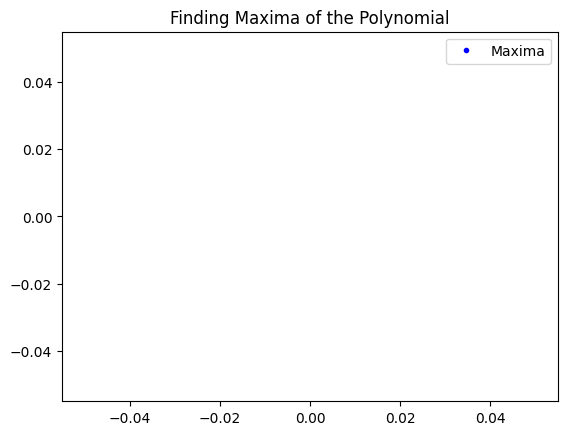

In [38]:
# Function to evaluate the negative of the polynomial
def eval_negative_polynomial(coeffs, x):
    return -eval_polynomial(coeffs, x)
def gradient_ascent(xs, ys, coeffs, lr, epochs):
    losses = []
    for _ in range(epochs):
        gradients = calc_gradient_polynomial(coeffs, xs, ys)
        coeffs = [c + lr * g for c, g in zip(coeffs, gradients)]  # Notice the '+' for ascent
        y_bar = np.array([eval_negative_polynomial(coeffs, x) for x in xs])
        loss = -loss_mse(ys, y_bar)  # Maximizing the negative loss
        losses.append(loss)
    return coeffs, y_bar, losses
coeffs_max, y_bar_max, losses_max = gradient_ascent(hundred_xs, ys_cubic, [0, 0, 0, 0], 0.001, 1000)
plt.plot(hundred_xs, y_bar_max, 'b.', label='Maxima')
plt.legend()
plt.title('Finding Maxima of the Polynomial')
plt.show()


# **QUESTIONS**

**1.   You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your answer.**

In full batch gradient descent, shuffling the training data is not necessary because the algorithm uses the entire dataset to compute the gradient at each step. Since it considers all the data points together, the order doesn't matter. Shuffling is more relevant in methods like mini-batch or stochastic gradient descent, where only a subset of the data is used at each iteration, and order could affect the learning process.

**2.  You would like to train a dog/cat image classifier using mini-batch gradient descent. You have already split your dataset into train, dev and test sets. The classes are balanced. You realize that within the training set, the images are ordered in such a way that all the dog images come first and all the cat images come after. A friend tells you: ”you absolutely need to shuffle your training set before the training procedure.” Is your friend right? Explain.**

Yes, my friend is right. In mini-batch gradient descent, it's important to shuffle the training set because if the data is ordered (all dogs first, then all cats), each mini-batch will only contain one class. This can cause the model to learn biased or ineffective representations, leading to poor generalization. Shuffling ensures that each mini-batch is a good mix of both classes, helping the model learn better and avoid overfitting to one class.